In [ ]:
pwd


'/home/wsuser/work'

**Importing the required libraries**

In [ ]:
!pip install tensorflow 
!pip install keras

In [ ]:
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D 
from keras.utils import np_utils 
import matplotlib.pyplot as plt 

**Load data**

In [ ]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='80bpeEczl5btEjsCCpo0klid5WLhhYiedCKG6aEviOVK',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittendigitrecognition-donotdelete-pr-x9vvmczanx2bvt'
object_key = 'uploads.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [ ]:
from io import BytesIo
import zipfile
unzip=zipfile.Zipfile(BytesIO(streaming_body_1.read()),'r')
file_paths-unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [ ]:
pwd

'/home/wsuser/work'

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

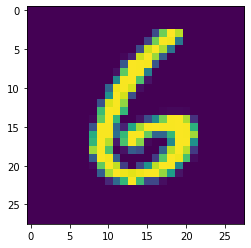

In [ ]:
plt.imshow(x_train[6000])

In [ ]:
np.argmax(y_train[6000])

0

**Reshaping Dataset**

In [ ]:
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

**Applying One Hot Encoding**

In [ ]:
number_of_classes = 10  #storing the no of classes in a variable


In [ ]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)



**Add CNN Layers**

In [ ]:
model=Sequential ()

In [ ]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [ ]:
#flatten the dimension of the image
model.add(Flatten())

In [ ]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

**Compiling the model**

In [ ]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [ ]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

**Train the model**


In [ ]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 9.8245 - accuracy: 0.8397 - val_loss: 6.1860 - val_accuracy: 0.8786
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 6.1936 - accuracy: 0.8777 - val_loss: 6.6679 - val_accuracy: 0.8730
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 5.6770 - accuracy: 0.8841 - val_loss: 5.5390 - val_accuracy: 0.8977
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.4370 - accuracy: 0.8860 - val_loss: 5.0167 - val_accuracy: 0.9004
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3907 - accuracy: 0.8874 - val_loss: 6.5449 - val_accuracy: 0.8783


**Save the model**

In [ ]:
model.save("mnistCNN.h5")

In [ ]:
!tar -zcvf Handwritten-digit-recognition-model_new.tgz mnistCNN.h5

mnistCNN.h5


In [ ]:
ls-1

Handwritten-digit-recognition-model_new.tgz
mnistCNN.h5


**Cloud deployment**

In [ ]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 20.0 MB/s eta 0:00:01


In [ ]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"FLCbpj1UyJacpIC14KQ7-C19OI0u2hZixxzZAsswJZHJ"
}
client=APIClient(wml_credentials)

In [ ]:
client=APIClient(wml_credentials)

In [ ]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

In [ ]:
space_uid=guid_from_space_name(client,'handwrittendigitrecognition')
print("Space UID="+space_uid)

Space UID=e8175477-5810-4372-8bb6-4fc5e9770ba4


In [ ]:
client.set.default_space(space_uid)

'SUCCESS'

In [ ]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

In [ ]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [ ]:
model_details = client.repository.store_model(model='Handwritten-digit-recognition-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})
model_id=client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [ ]:
model_id

'd6367995-c4cf-4679-bb8e-3d101886ecc7'

In [ ]:
client.repository.download(model_id,'my_model.tar.gz')

Successfully saved model content to file: 'my_model.tar.gz'


'/home/wsuser/work/my_model.tar.gz'

**Test the model**

In [ ]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [ ]:
model=load_model("mnistCNN.h5")

In [ ]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='80bpeEczl5btEjsCCpo0klid5WLhhYiedCKG6aEviOVK',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittendigitrecognition-donotdelete-pr-x9vvmczanx2bvt'
object_key = '9.png'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [ ]:
img = Image.open(streaming_body_2).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [ ]:
img

In [ ]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [ ]:
pred = model.predict(im2arr)
print(pred)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 3.1153780e-34 7.0210286e-15
  0.0000000e+00 0.0000000e+00 0.0000000e+00 3.3097619e-23 1.0000000e+00]]


In [ ]:
print(np.argmax(pred, axis=1)) #printing our Labels

[9]
